In [1]:
import numpy
import tqdm
import scipy
import scipy.stats
import matplotlib
import matplotlib.pyplot
from joblib import dump, load
from sklearn.neural_network import MLPClassifier
from dirichlet_python.dirichletcal.calib.tempscaling import TemperatureScaling
%matplotlib inline

In [2]:
# specify the dataset settings (a mixutre of gaussian)

pi = numpy.ones(3) / 3
ita_0 = numpy.array([0.5, 0.5])
ita_1 = numpy.array([0.5, 0.5])
mu_0_0 = numpy.array([4.0]) 
mu_0_1 = numpy.array([-64.0]) 
mu_1_0 = numpy.array([-4.0])
mu_1_1 = numpy.array([72.0 ]) 
cov_0_0 = numpy.array([960.0])
cov_0_1 = numpy.array([1280.0])
cov_1_0 = numpy.array([980.0])
cov_1_1 = numpy.array([1024.0])

ita_2 = numpy.array([0.5, 0.5])
mu_2_0 = numpy.array([0.0]) 
mu_2_1 = numpy.array([0.0]) 
cov_2_0 = numpy.array([8.0])
cov_2_1 = numpy.array([8.0])

In [3]:
N = 10000
y = scipy.stats.multinomial.rvs(p=numpy.hstack([pi[0]*ita_0, pi[1]*ita_1, pi[2]*ita_2]), size=N, n=1)
x = [scipy.stats.multivariate_normal.rvs(mean=mu_0_0, cov=cov_0_0, size=N).reshape(-1, 1),
     scipy.stats.multivariate_normal.rvs(mean=mu_0_1, cov=cov_0_1, size=N).reshape(-1, 1),
     scipy.stats.multivariate_normal.rvs(mean=mu_1_0, cov=cov_1_0, size=N).reshape(-1, 1),
     scipy.stats.multivariate_normal.rvs(mean=mu_1_1, cov=cov_1_1, size=N).reshape(-1, 1),
     scipy.stats.multivariate_normal.rvs(mean=mu_2_0, cov=cov_2_0, size=N).reshape(-1, 1),
     scipy.stats.multivariate_normal.rvs(mean=mu_2_1, cov=cov_2_1, size=N).reshape(-1, 1)]

x = x[0] * y[:, 0].reshape(-1, 1) + x[1] * y[:, 1].reshape(-1, 1) + \
    x[2] * y[:, 2].reshape(-1, 1) + x[3] * y[:, 3].reshape(-1, 1) + \
    x[4] * y[:, 4].reshape(-1, 1) + x[5] * y[:, 5].reshape(-1, 1)

y = numpy.vstack([y[:, 0] + y[:, 1],
                  y[:, 2] + y[:, 3],
                  y[:, 4] + y[:, 5]]).transpose()

In [4]:
# specify the visualisation settings

N_grid = 1024
edge = 160.0
v_edge = 160.0
x_mesh = numpy.linspace(-edge, edge, N_grid).reshape(-1, 1)

In [5]:
# calculate the corresponding densities and probabilities

p_x_y = numpy.vstack([pi[0] * ita_0[0] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_0_0, cov=cov_0_0) +
                      pi[1] * ita_0[1] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_0_1, cov=cov_0_1),
                      pi[1] * ita_1[0] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_1_0, cov=cov_1_0) +
                      pi[1] * ita_1[1] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_1_1, cov=cov_1_1),
                      pi[2] * ita_2[0] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_2_0, cov=cov_2_0) +
                      pi[2] * ita_2[1] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_2_1, cov=cov_2_1)])

p_x =  numpy.sum(p_x_y, axis=0)

p_y_g_x = p_x_y / p_x

p_x = p_x
p_x_y = p_x_y
p_x_g_y = p_x_y / pi.reshape(-1, 1)

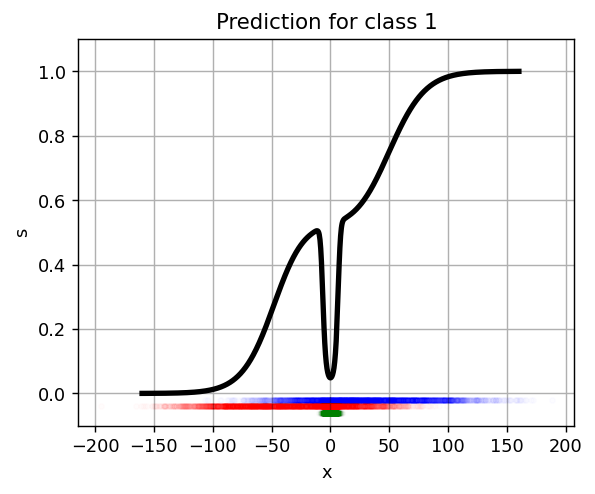

In [15]:
# predicted probabilities for class 1
matplotlib.pyplot.figure(dpi=128, figsize=(5, 4))
matplotlib.pyplot.plot(-x_mesh, p_y_g_x[0], 'k', linewidth=3.0)
matplotlib.pyplot.plot(-x[y[:, 0]==1], numpy.zeros(numpy.sum(y[:, 0]==1)) - 2e-2, 'bo', markersize=3, alpha=0.01)
matplotlib.pyplot.plot(-x[y[:, 0]==0], numpy.zeros(numpy.sum(y[:, 0]==0)) - 4e-2, 'ro', markersize=3, alpha=0.01)
matplotlib.pyplot.plot(-x[y[:, 2]==1], numpy.zeros(numpy.sum(y[:, 2]==1)) - 6e-2, 'go', markersize=3, alpha=0.01)
matplotlib.pyplot.ylim([-0.1, 1.1])
matplotlib.pyplot.xlabel('x')
matplotlib.pyplot.ylabel('s')
matplotlib.pyplot.title('Prediction for class 1')
matplotlib.pyplot.grid()

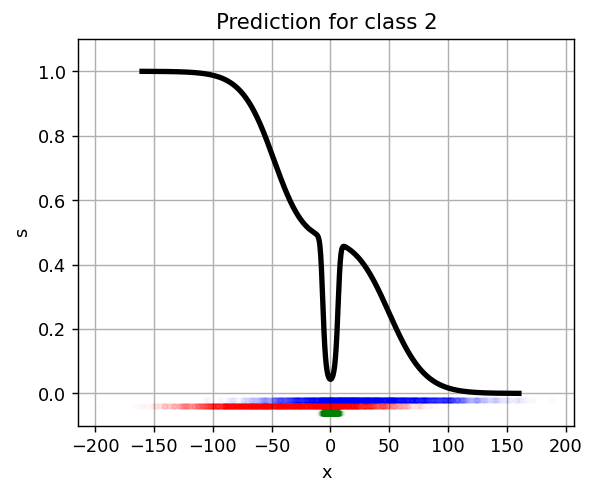

In [16]:
# predicted probabilities for class 2
matplotlib.pyplot.figure(dpi=128, figsize=(5, 4))
matplotlib.pyplot.plot(-x_mesh, p_y_g_x[1], 'k', linewidth=3.0)
matplotlib.pyplot.plot(-x[y[:, 0]==1], numpy.zeros(numpy.sum(y[:, 0]==1)) - 2e-2, 'bo', markersize=3, alpha=0.01)
matplotlib.pyplot.plot(-x[y[:, 0]==0], numpy.zeros(numpy.sum(y[:, 0]==0)) - 4e-2, 'ro', markersize=3, alpha=0.01)
matplotlib.pyplot.plot(-x[y[:, 2]==1], numpy.zeros(numpy.sum(y[:, 2]==1)) - 6e-2, 'go', markersize=3, alpha=0.01)
matplotlib.pyplot.ylim([-0.1, 1.1])
matplotlib.pyplot.xlabel('x')
matplotlib.pyplot.ylabel('s')
matplotlib.pyplot.title('Prediction for class 2')
matplotlib.pyplot.grid()

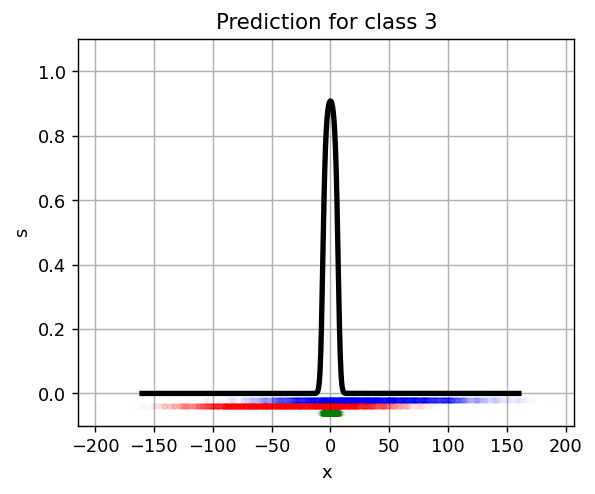

In [17]:
# predicted probabilities for class 3
matplotlib.pyplot.figure(dpi=128, figsize=(5, 4))
matplotlib.pyplot.plot(-x_mesh, p_y_g_x[2], 'k', linewidth=3.0)
matplotlib.pyplot.plot(-x[y[:, 0]==1], numpy.zeros(numpy.sum(y[:, 0]==1)) - 2e-2, 'bo', markersize=3, alpha=0.01)
matplotlib.pyplot.plot(-x[y[:, 0]==0], numpy.zeros(numpy.sum(y[:, 0]==0)) - 4e-2, 'ro', markersize=3, alpha=0.01)
matplotlib.pyplot.plot(-x[y[:, 2]==1], numpy.zeros(numpy.sum(y[:, 2]==1)) - 6e-2, 'go', markersize=3, alpha=0.01)
matplotlib.pyplot.ylim([-0.1, 1.1])
matplotlib.pyplot.xlabel('x')
matplotlib.pyplot.ylabel('s')
matplotlib.pyplot.title('Prediction for class 3')
matplotlib.pyplot.grid()